In [1]:
from overall_anotator import OverallAnotator
from data_structures import SentimentAnnotation, AspectAnnotation, AspectBasedResults
from transforms import transform_aspects

In [2]:
import pandas as pd
import numpy as np
laptops = pd.read_csv("../data/Laptop_Train_v2.csv").sort_values(by=['id'])
amazon = pd.read_csv("../data/amazon_electronics.csv")
to_annotate = list(laptops['Sentence'].unique()[1:10])


In [3]:
laptops_sentiment = transform_aspects(laptops, "id", "Sentence", "Aspect Term", "polarity")

In [12]:
flair_annotator = OverallAnotator(tool = "flair")
chat_annotator = OverallAnotator(tool = "chat_gpt", gpt_key="")

In [5]:
flair_annotator.annotate(to_annotate)

[SentimentAnnotation(text='I bought a protector for my key pad and it works great :)', label='POSITIVE', score=0.9991540908813477),
 SentimentAnnotation(text="The mouse is a little bit different than what you're used to though- it has one big flat panel and one full bar (instead of two separate ones) to click with- but you get used to it quite quickly.", label='POSITIVE', score=0.9994208812713623),
 SentimentAnnotation(text='AND the best part is that it even comes with a free printer (when they have a certain promotion/offer going, of course)!', label='POSITIVE', score=0.9260944724082947),
 SentimentAnnotation(text='Overall, this laptop is definitely a keeper with its simple yet stylish design and its array of fantastic colors to choose from.', label='POSITIVE', score=0.9996365308761597),
 SentimentAnnotation(text='The Apple team also assists you very nicely when choosing which computer is right for you :)', label='POSITIVE', score=0.9991105198860168),
 SentimentAnnotation(text='For th

In [13]:
chat_annotator.annotate(to_annotate[1:3])

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [17]:
from aspect_anotator import AspectAnotator

In [19]:
aspect_annotator = AspectAnotator(stage1_tool = "spacy", 
                                stage2_tool="sentistrength", 
                                ss_jar_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/SentiStrength.jar',
                                ss_lang_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/data')


In [20]:
aspect_annotator = AspectAnotator(full_tool="pyabsa")

[2023-12-01 19:04:16] (2.3.4) Please specify the task code, e.g. from pyabsa import TaskCodeOption


[2023-12-01 19:04:19] (2.3.4) Downloading checkpoint:multilingual 
[2023-12-01 19:04:19] (2.3.4) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip, unzipping


Done.
[2023-12-01 19:06:54] (2.3.4) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/Multilingual/ATEPC/fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip 
[2023-12-01 19:06:54] (2.3.4) Load aspect extractor from checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT
[2023-12-01 19:06:54] (2.3.4) config: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.config
[2023-12-01 19:06:54] (2.3.4) state_dict: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.state_dict
[2023-12-01 19:06:54] (2.3.4) model: None
[2023-12-01 19:06:54] (2.3.4) tokenizer: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.tokenizer
[2023-12-01 19:06:55] (2.3.4) Set Model Device: cpu
[2023-12-01 19:06:55] (2.3.4) Device Name: Unknown


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

c:\Users\marty\OneDrive\Dokumenty\notatki\9 semestr\NLP\NLP-BAMK-project\venv\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\marty\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

c:\Users\marty\OneDrive\Dokumenty\notatki\9 semestr\NLP\NLP-BAMK-project\venv\Lib\site-packages\transformers\convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.


In [21]:
ind = list(np.random.randint(1,len(laptops_sentiment), 200))
true_annots = [laptops_sentiment[i] for i in ind]
texts = [x.text for x in true_annots]

In [22]:
res = aspect_annotator.test_annotator(true_annotations=true_annots)

preparing apc inference dataloader: 100%|██████████| 326/326 [00:02<00:00, 144.99it/s]
c:\Users\marty\OneDrive\Dokumenty\notatki\9 semestr\NLP\NLP-BAMK-project\venv\Lib\site-packages\pyabsa\tasks\AspectTermExtraction\prediction\aspect_extractor.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
classifying aspect sentiments: 100%|██████████| 11/11 [02:53<00:00, 15.79s/it]


In [23]:
res

AspectBasedResults(correct=258, incorrect=8, partial=29, missing=25, spurious=31, possible=320, actual=326, precision=0.7914110429447853, recall=0.80625, f1=0.7987616099071208, name=None)

c:\Users\marty\OneDrive\Dokumenty\notatki\9 semestr\NLP\NLP-BAMK-project\venv\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.


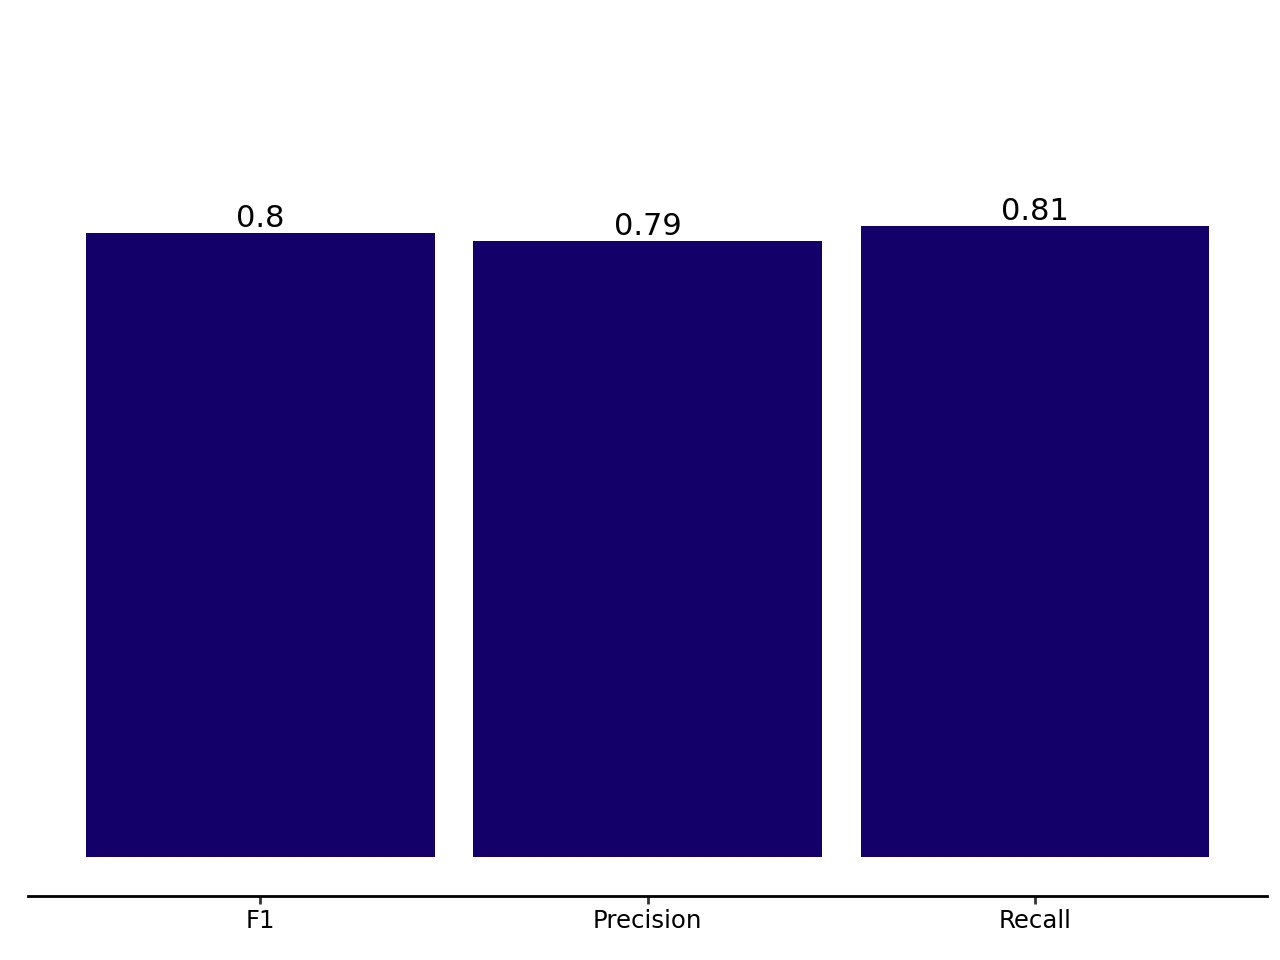

<Figure Size: (640 x 480)>

In [24]:
res.plot()

In [25]:
aspect_annotator.annotate(texts)

classifying aspect sentiments: 100%|██████████| 11/11 [03:06<00:00, 16.94s/it]


[AspectAnnotation(text='I hope to edit this in the next few hours , I am going to try to install my own copy of Windows 7 .', aspects=[SentimentAnnotation(text='Windows 7', label='Neutral', score=0.9657)]),
 AspectAnnotation(text='I had 3 months when the ports started going out .', aspects=[SentimentAnnotation(text='ports', label='Negative', score=0.9966)]),
 AspectAnnotation(text='Although the price is higher then Dell laptops , the Macbooks are worth the dough .', aspects=[SentimentAnnotation(text='price', label='Negative', score=0.9891), SentimentAnnotation(text='dough', label='Positive', score=0.9952)]),
 AspectAnnotation(text='The computer is currently in West Verginia doe to the method of shipping choosen by Toshiba .', aspects=[SentimentAnnotation(text='shipping', label='Negative', score=0.9688)]),
 AspectAnnotation(text="I know that everyone thinks Macs are overpriced and overrated , but once you get past the initial expense you ' ll find that they ' re worth every penny ( besi

In [26]:
results = amazon['overall'].copy().astype(str)

In [27]:
results[amazon['overall']>3] = "positive"
results[amazon['overall']==3] = "neutral"
results[amazon['overall']<3] = "negative"

In [28]:
annotator = OverallAnotator(tool = "sentistrength", 
                            ss_jar_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/SentiStrength.jar',
                            ss_lang_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/data')

In [30]:
ind = list(np.random.randint(1,len(results), 100))
res = annotator.test_annotator(amazon['reviewText'][ind], results[ind])

Exception: 

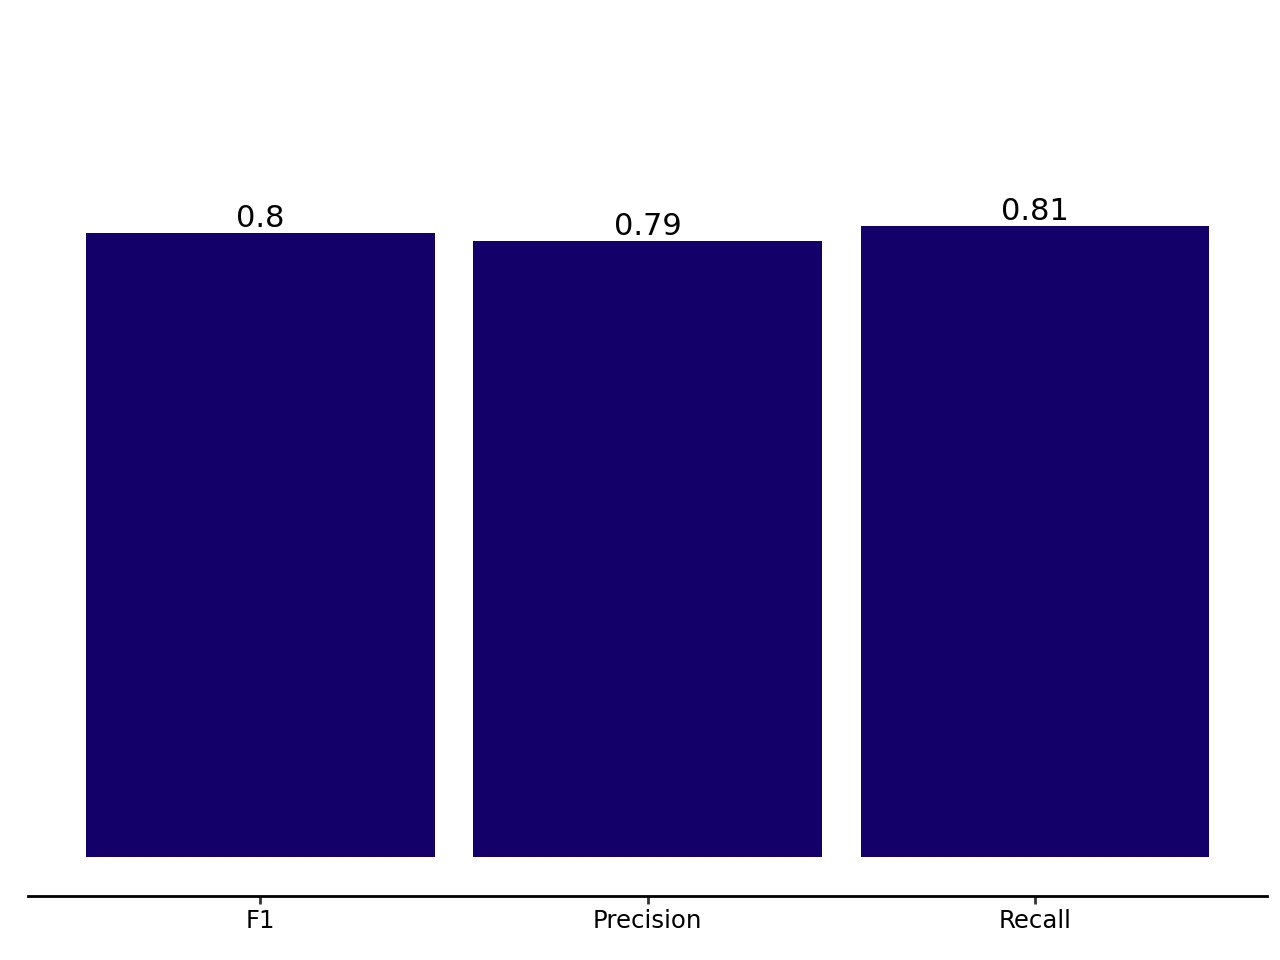

<Figure Size: (640 x 480)>

In [31]:
res.plot()